# Florence-2-large sample usage

In [1]:
!pip install flash_attn timm einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cuspar

In [2]:
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import requests
import copy
%matplotlib inline

In [3]:
model_id = 'microsoft/Florence-2-base-ft'
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True).eval().cuda()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.43k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base-ft:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base-ft:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/464M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base-ft:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## define the prediction function

In [4]:
def run_example(task_prompt, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt")
    print(f"inputs ---> {inputs}")

    generated_ids = model.generate(
      input_ids=inputs["input_ids"].cuda(),
      pixel_values=inputs["pixel_values"].cuda(),
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    print(f"generated_ids ---> {generated_ids}")

    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    print(f"generated_text ---> {generated_text}")

    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height)
    )

    return parsed_answer

## init image

In [5]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw)

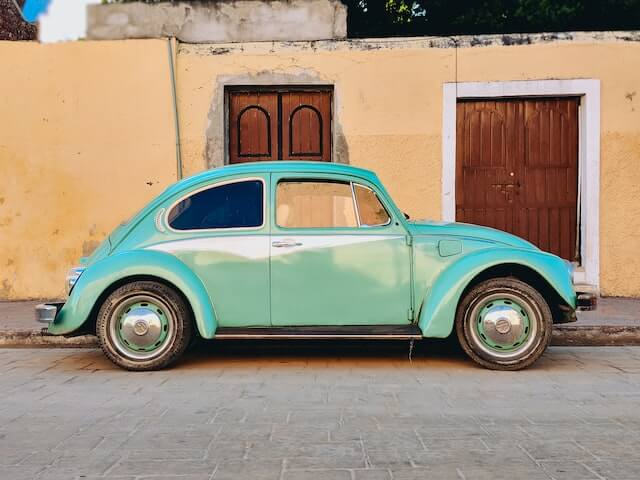

In [6]:
image

## Run pre-defined tasks without additional inputs

### Caption

In [7]:
task_prompt = '<CAPTION>'
run_example(task_prompt)

inputs ---> {'input_ids': tensor([[   0, 2264,  473,    5, 2274, 6190,  116,    2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[-1.1418, -0.7479, -0.9192,  ..., -1.9295, -1.9467, -1.9638],
          [-0.7650, -0.7137, -0.9192,  ..., -1.9295, -1.9467, -1.9638],
          [-0.2684, -0.7308, -0.9705,  ..., -1.9467, -1.9638, -1.9809],
          ...,
          [ 0.5707,  0.5707,  0.5707,  ...,  0.3481,  0.3481,  0.3652],
          [ 0.5707,  0.5707,  0.5707,  ...,  0.3823,  0.3823,  0.3652],
          [ 0.5707,  0.5707,  0.5707,  ...,  0.4166,  0.3994,  0.3823]],

         [[-1.3880, -0.9853, -1.1604,  ..., -1.6506, -1.6681, -1.6856],
          [-1.0028, -0.9503, -1.1604,  ..., -1.6506, -1.6681, -1.6856],
          [-0.4951, -0.9678, -1.2129,  ..., -1.6681, -1.6856, -1.7031],
          ...,
          [ 0.6078,  0.6078,  0.6078,  ...,  0.3978,  0.3978,  0.4153],
          [ 0.6078,  0.6078,  0.6078,  ...,  0.4328,  0.4328,  0.4153],
          [ 0.6078, 

{'<CAPTION>': 'A green car parked in front of a yellow building.'}

In [8]:
task_prompt = '<DETAILED_CAPTION>'
run_example(task_prompt)

inputs ---> {'input_ids': tensor([[    0, 47066, 21700,    11,  4617,    99,    16,  2343,    11,     5,
          2274,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[-1.1418, -0.7479, -0.9192,  ..., -1.9295, -1.9467, -1.9638],
          [-0.7650, -0.7137, -0.9192,  ..., -1.9295, -1.9467, -1.9638],
          [-0.2684, -0.7308, -0.9705,  ..., -1.9467, -1.9638, -1.9809],
          ...,
          [ 0.5707,  0.5707,  0.5707,  ...,  0.3481,  0.3481,  0.3652],
          [ 0.5707,  0.5707,  0.5707,  ...,  0.3823,  0.3823,  0.3652],
          [ 0.5707,  0.5707,  0.5707,  ...,  0.4166,  0.3994,  0.3823]],

         [[-1.3880, -0.9853, -1.1604,  ..., -1.6506, -1.6681, -1.6856],
          [-1.0028, -0.9503, -1.1604,  ..., -1.6506, -1.6681, -1.6856],
          [-0.4951, -0.9678, -1.2129,  ..., -1.6681, -1.6856, -1.7031],
          ...,
          [ 0.6078,  0.6078,  0.6078,  ...,  0.3978,  0.3978,  0.4153],
          [ 0.6078,  0.60

{'<DETAILED_CAPTION>': 'In this image, we can see a car on the road and in the background, there are doors and we can also see a wall. At the top, there is sky.'}

In [9]:
task_prompt = '<MORE_DETAILED_CAPTION>'
run_example(task_prompt)

inputs ---> {'input_ids': tensor([[    0, 47066, 21700,    19,    10, 17818,    99,    16,  2343,    11,
             5,  2274,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[-1.1418, -0.7479, -0.9192,  ..., -1.9295, -1.9467, -1.9638],
          [-0.7650, -0.7137, -0.9192,  ..., -1.9295, -1.9467, -1.9638],
          [-0.2684, -0.7308, -0.9705,  ..., -1.9467, -1.9638, -1.9809],
          ...,
          [ 0.5707,  0.5707,  0.5707,  ...,  0.3481,  0.3481,  0.3652],
          [ 0.5707,  0.5707,  0.5707,  ...,  0.3823,  0.3823,  0.3652],
          [ 0.5707,  0.5707,  0.5707,  ...,  0.4166,  0.3994,  0.3823]],

         [[-1.3880, -0.9853, -1.1604,  ..., -1.6506, -1.6681, -1.6856],
          [-1.0028, -0.9503, -1.1604,  ..., -1.6506, -1.6681, -1.6856],
          [-0.4951, -0.9678, -1.2129,  ..., -1.6681, -1.6856, -1.7031],
          ...,
          [ 0.6078,  0.6078,  0.6078,  ...,  0.3978,  0.3978,  0.4153],
          [ 0.6

{'<MORE_DETAILED_CAPTION>': 'A light green car is parked in front of a yellow building. There is a brown door on the building behind the car. '}

### Object detection

OD results format:
{'\<OD>':
    {
    'bboxes': [[x1, y1, x2, y2], ...],
    'labels': ['label1', 'label2', ...]
    }
}

In [10]:
task_prompt = '<OD>'
results = run_example(task_prompt)
print(results)

inputs ---> {'input_ids': tensor([[    0,   574, 22486,     5,  8720,    19,  4120,   766,    11,     5,
          2274,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[-1.1418, -0.7479, -0.9192,  ..., -1.9295, -1.9467, -1.9638],
          [-0.7650, -0.7137, -0.9192,  ..., -1.9295, -1.9467, -1.9638],
          [-0.2684, -0.7308, -0.9705,  ..., -1.9467, -1.9638, -1.9809],
          ...,
          [ 0.5707,  0.5707,  0.5707,  ...,  0.3481,  0.3481,  0.3652],
          [ 0.5707,  0.5707,  0.5707,  ...,  0.3823,  0.3823,  0.3652],
          [ 0.5707,  0.5707,  0.5707,  ...,  0.4166,  0.3994,  0.3823]],

         [[-1.3880, -0.9853, -1.1604,  ..., -1.6506, -1.6681, -1.6856],
          [-1.0028, -0.9503, -1.1604,  ..., -1.6506, -1.6681, -1.6856],
          [-0.4951, -0.9678, -1.2129,  ..., -1.6681, -1.6856, -1.7031],
          ...,
          [ 0.6078,  0.6078,  0.6078,  ...,  0.3978,  0.3978,  0.4153],
          [ 0.6078,  0.60

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def plot_bbox(image, data):
   # Create a figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Plot each bounding box
    for bbox, label in zip(data['bboxes'], data['labels']):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = bbox
        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        # Add the rectangle to the Axes
        ax.add_patch(rect)
        # Annotate the label
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

    # Remove the axis ticks and labels
    ax.axis('off')

    # Show the plot
    plt.show()

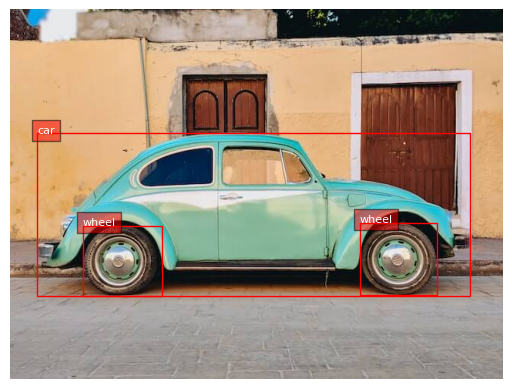

In [13]:
plot_bbox(image, results['<OD>'])

### Dense region caption

Dense region caption results format:
{'\<DENSE_REGION_CAPTION>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['label1', 'label2', ...]}}

In [14]:
task_prompt = '<DENSE_REGION_CAPTION>'
results = run_example(task_prompt)
print(results)

inputs ---> {'input_ids': tensor([[    0,   574, 22486,     5,  8720,    11,     5,  2274,     6,    19,
            49, 24173,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[-1.1418, -0.7479, -0.9192,  ..., -1.9295, -1.9467, -1.9638],
          [-0.7650, -0.7137, -0.9192,  ..., -1.9295, -1.9467, -1.9638],
          [-0.2684, -0.7308, -0.9705,  ..., -1.9467, -1.9638, -1.9809],
          ...,
          [ 0.5707,  0.5707,  0.5707,  ...,  0.3481,  0.3481,  0.3652],
          [ 0.5707,  0.5707,  0.5707,  ...,  0.3823,  0.3823,  0.3652],
          [ 0.5707,  0.5707,  0.5707,  ...,  0.4166,  0.3994,  0.3823]],

         [[-1.3880, -0.9853, -1.1604,  ..., -1.6506, -1.6681, -1.6856],
          [-1.0028, -0.9503, -1.1604,  ..., -1.6506, -1.6681, -1.6856],
          [-0.4951, -0.9678, -1.2129,  ..., -1.6681, -1.6856, -1.7031],
          ...,
          [ 0.6078,  0.6078,  0.6078,  ...,  0.3978,  0.3978,  0.4153],
          [ 0.6

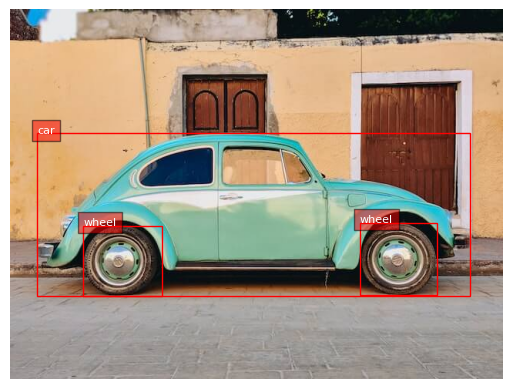

In [15]:
plot_bbox(image, results['<DENSE_REGION_CAPTION>'])

### Region proposal

Region proposal results format:
{'<REGION_PROPOSAL>' : {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}

In [16]:
task_prompt = '<REGION_PROPOSAL>'
results = run_example(task_prompt)
print(results)

inputs ---> {'input_ids': tensor([[    0,   574, 22486,     5,   976,  5327,    11,     5,  2274,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[-1.1418, -0.7479, -0.9192,  ..., -1.9295, -1.9467, -1.9638],
          [-0.7650, -0.7137, -0.9192,  ..., -1.9295, -1.9467, -1.9638],
          [-0.2684, -0.7308, -0.9705,  ..., -1.9467, -1.9638, -1.9809],
          ...,
          [ 0.5707,  0.5707,  0.5707,  ...,  0.3481,  0.3481,  0.3652],
          [ 0.5707,  0.5707,  0.5707,  ...,  0.3823,  0.3823,  0.3652],
          [ 0.5707,  0.5707,  0.5707,  ...,  0.4166,  0.3994,  0.3823]],

         [[-1.3880, -0.9853, -1.1604,  ..., -1.6506, -1.6681, -1.6856],
          [-1.0028, -0.9503, -1.1604,  ..., -1.6506, -1.6681, -1.6856],
          [-0.4951, -0.9678, -1.2129,  ..., -1.6681, -1.6856, -1.7031],
          ...,
          [ 0.6078,  0.6078,  0.6078,  ...,  0.3978,  0.3978,  0.4153],
          [ 0.6078,  0.6078,  0.6078,  ...,  

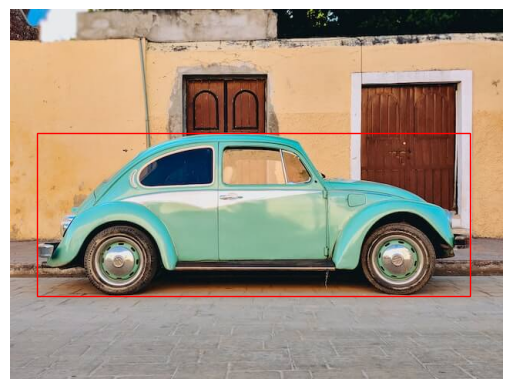

In [17]:
plot_bbox(image, results['<REGION_PROPOSAL>'])

## Run pre-defined tasks that requires additional inputs

### Phrase Grounding
Phrase grounding results format:
{'\<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}

In [18]:
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input="A green car parked in front of a yellow building.")
print(results)

inputs ---> {'input_ids': tensor([[    0,   574, 22486,     5, 22810,    11,     5,  3747,    35,    83,
          2272,   512,  9181,    11,   760,     9,    10,  5718,   745,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[-1.1418, -0.7479, -0.9192,  ..., -1.9295, -1.9467, -1.9638],
          [-0.7650, -0.7137, -0.9192,  ..., -1.9295, -1.9467, -1.9638],
          [-0.2684, -0.7308, -0.9705,  ..., -1.9467, -1.9638, -1.9809],
          ...,
          [ 0.5707,  0.5707,  0.5707,  ...,  0.3481,  0.3481,  0.3652],
          [ 0.5707,  0.5707,  0.5707,  ...,  0.3823,  0.3823,  0.3652],
          [ 0.5707,  0.5707,  0.5707,  ...,  0.4166,  0.3994,  0.3823]],

         [[-1.3880, -0.9853, -1.1604,  ..., -1.6506, -1.6681, -1.6856],
          [-1.0028, -0.9503, -1.1604,  ..., -1.6506, -1.6681, -1.6856],
          [-0.4951, -0.9678, -1.2129,  ..., -1.6681, -1.6856, -1.7031],
          ...,
        

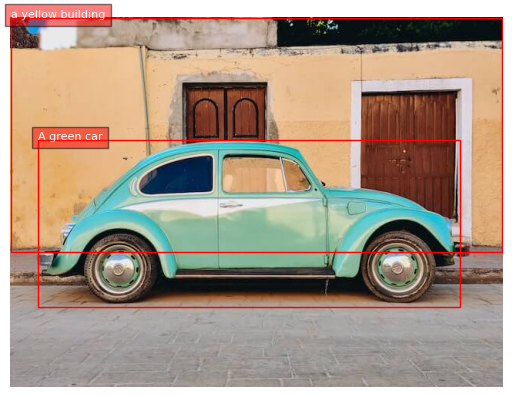

In [19]:
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])

### Referring expression segmentation

Referring expression segmentation results format:
{'\<REFERRING_EXPRESSION_SEGMENTATION>': {'Polygons': [[[polygon]], ...], 'labels': ['', '', ...]}}, one object is represented by a list of polygons. each polygon is [x1, y1, x2, y2, ..., xn, yn]

In [ ]:
task_prompt = '<REFERRING_EXPRESSION_SEGMENTATION>'
results = run_example(task_prompt, text_input="a green car")
print(results)

{'<REFERRING_EXPRESSION_SEGMENTATION>': {'polygons': [[[180.8000030517578, 180.72000122070312, 182.72000122070312, 180.72000122070312, 187.83999633789062, 177.83999633789062, 189.75999450683594, 177.83999633789062, 192.95999145507812, 175.9199981689453, 194.87998962402344, 175.9199981689453, 198.0800018310547, 174.0, 200.63999938964844, 173.0399932861328, 203.83999633789062, 172.0800018310547, 207.0399932861328, 170.63999938964844, 209.59999084472656, 169.67999267578125, 214.0800018310547, 168.72000122070312, 217.9199981689453, 167.75999450683594, 221.75999450683594, 166.8000030517578, 226.239990234375, 165.83999633789062, 230.72000122070312, 164.87998962402344, 237.1199951171875, 163.9199981689453, 244.1599884033203, 162.95999145507812, 253.1199951171875, 162.0, 265.2799987792969, 161.0399932861328, 312.6399841308594, 161.0399932861328, 328.6399841308594, 162.0, 337.6000061035156, 162.95999145507812, 344.6399841308594, 163.9199981689453, 349.7599792480469, 164.87998962402344, 353.6000

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import random
import numpy as np
colormap = ['blue','orange','green','purple','brown','pink','gray','olive','cyan','red',
            'lime','indigo','violet','aqua','magenta','coral','gold','tan','skyblue']
def draw_polygons(image, prediction, fill_mask=False):
    """
    Draws segmentation masks with polygons on an image.

    Parameters:
    - image_path: Path to the image file.
    - prediction: Dictionary containing 'polygons' and 'labels' keys.
                  'polygons' is a list of lists, each containing vertices of a polygon.
                  'labels' is a list of labels corresponding to each polygon.
    - fill_mask: Boolean indicating whether to fill the polygons with color.
    """
    # Load the image

    draw = ImageDraw.Draw(image)


    # Set up scale factor if needed (use 1 if not scaling)
    scale = 1

    # Iterate over polygons and labels
    for polygons, label in zip(prediction['polygons'], prediction['labels']):
        color = random.choice(colormap)
        fill_color = random.choice(colormap) if fill_mask else None

        for _polygon in polygons:
            _polygon = np.array(_polygon).reshape(-1, 2)
            if len(_polygon) < 3:
                print('Invalid polygon:', _polygon)
                continue

            _polygon = (_polygon * scale).reshape(-1).tolist()

            # Draw the polygon
            if fill_mask:
                draw.polygon(_polygon, outline=color, fill=fill_color)
            else:
                draw.polygon(_polygon, outline=color)

            # Draw the label text
            draw.text((_polygon[0] + 8, _polygon[1] + 2), label, fill=color)

    # Save or display the image
    #image.show()  # Display the image
    display(image)

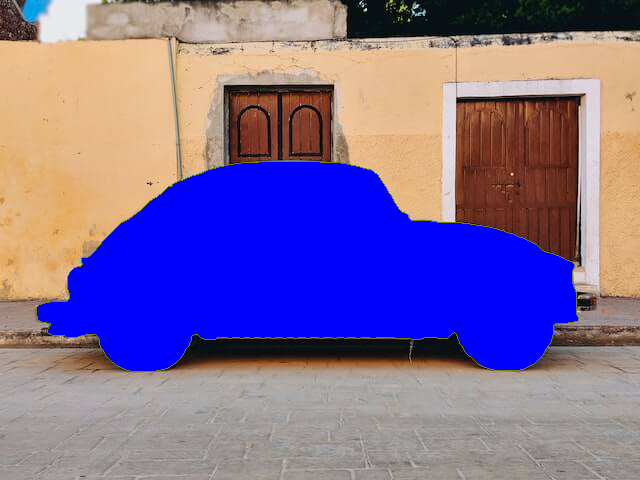

In [ ]:
output_image = copy.deepcopy(image)
draw_polygons(output_image, results['<REFERRING_EXPRESSION_SEGMENTATION>'], fill_mask=True)

### region to segmentation


with additional region as inputs, format is '\<loc_x1>\<loc_y1>\<loc_x2>\<loc_y2>', [x1, y1, x2, y2] is the quantized corrdinates in [0, 999].

In [ ]:
task_prompt = '<REGION_TO_SEGMENTATION>'
results = run_example(task_prompt, text_input="<loc_702><loc_575><loc_866><loc_772>")
print(results)

{'<REGION_TO_SEGMENTATION>': {'polygons': [[[468.79998779296875, 288.239990234375, 472.6399841308594, 285.3599853515625, 475.8399963378906, 283.44000244140625, 477.7599792480469, 282.47998046875, 479.67999267578125, 282.47998046875, 482.8799743652344, 280.55999755859375, 485.44000244140625, 279.6000061035156, 488.6399841308594, 278.6399841308594, 491.8399963378906, 277.67999267578125, 497.5999755859375, 276.7200012207031, 511.67999267578125, 276.7200012207031, 514.8800048828125, 277.67999267578125, 518.0800170898438, 278.6399841308594, 520.6400146484375, 280.55999755859375, 522.5599975585938, 280.55999755859375, 524.47998046875, 282.47998046875, 527.6799926757812, 283.44000244140625, 530.8800048828125, 285.3599853515625, 534.0800170898438, 287.2799987792969, 543.0399780273438, 296.3999938964844, 544.9599609375, 299.2799987792969, 546.8800048828125, 302.1600036621094, 548.7999877929688, 306.47998046875, 548.7999877929688, 308.3999938964844, 550.719970703125, 311.2799987792969, 552.0, 31

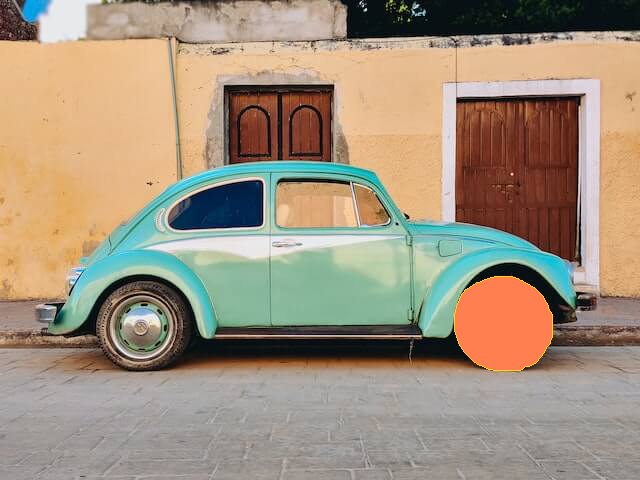

In [ ]:
output_image = copy.deepcopy(image)
draw_polygons(output_image, results['<REGION_TO_SEGMENTATION>'], fill_mask=True)

### Open vocabulary detection

open vocabulary detection can detect both objects and ocr texts.

results format:

{ '\<OPEN_VOCABULARY_DETECTION>': {'bboxes': [[x1, y1, x2, y2], [x1, y1, x2, y2], ...]], 'bboxes_labels': ['label_1', 'label_2', ..],
'polygons': [[[x1, y1, x2, y2, ..., xn, yn], [x1, y1, ..., xn, yn]], ...], 'polygons_labels': ['label_1', 'label_2', ...]
}}

In [ ]:
task_prompt = '<OPEN_VOCABULARY_DETECTION>'
results = run_example(task_prompt, text_input="a green car")
print(results)

{'<OPEN_VOCABULARY_DETECTION>': {'bboxes': [[34.23999786376953, 158.63999938964844, 582.0800170898438, 374.1600036621094]], 'bboxes_labels': ['a green car'], 'polygons': [], 'polygons_labels': []}}


In [ ]:
def convert_to_od_format(data):
    """
    Converts a dictionary with 'bboxes' and 'bboxes_labels' into a dictionary with separate 'bboxes' and 'labels' keys.

    Parameters:
    - data: The input dictionary with 'bboxes', 'bboxes_labels', 'polygons', and 'polygons_labels' keys.

    Returns:
    - A dictionary with 'bboxes' and 'labels' keys formatted for object detection results.
    """
    # Extract bounding boxes and labels
    bboxes = data.get('bboxes', [])
    labels = data.get('bboxes_labels', [])

    # Construct the output format
    od_results = {
        'bboxes': bboxes,
        'labels': labels
    }

    return od_results

In [ ]:
bbox_results  = convert_to_od_format(results['<OPEN_VOCABULARY_DETECTION>'])

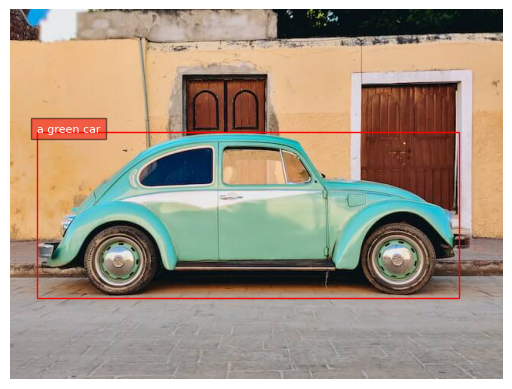

In [ ]:
plot_bbox(image, bbox_results)

### region to texts

In [ ]:
task_prompt = '<REGION_TO_CATEGORY>'
results = run_example(task_prompt, text_input="<loc_52><loc_332><loc_932><loc_774>")
print(results)

{'<REGION_TO_CATEGORY>': 'car<loc_52><loc_332><loc_932><loc_774>'}


In [ ]:
task_prompt = '<REGION_TO_DESCRIPTION>'
results = run_example(task_prompt, text_input="<loc_52><loc_332><loc_932><loc_774>")
print(results)

{'<REGION_TO_DESCRIPTION>': 'turquoise Volkswagen Beetle<loc_52><loc_332><loc_932><loc_774>'}


## ocr related tasks

In [ ]:
url = "http://ecx.images-amazon.com/images/I/51UUzBDAMsL.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw).convert('RGB')

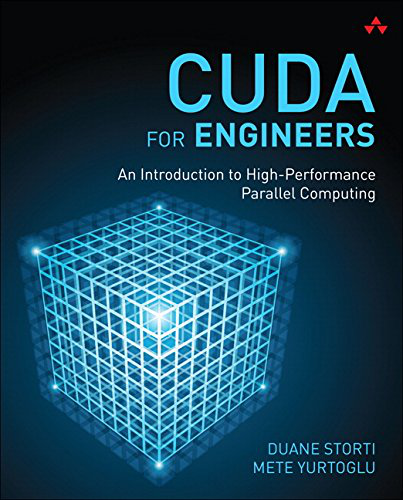

In [ ]:
image

In [ ]:
task_prompt = '<OCR>'
run_example(task_prompt)

{'<OCR>': 'CUDAFOR ENGINEERSAn Introduction to High-PerformanceParallel ComputingDUANE STORTIMETE YURTOGLU'}

In [ ]:
task_prompt = '<OCR_WITH_REGION>'
results = run_example(task_prompt)
print(results)
# ocr results format
# {'OCR_WITH_REGION': {'quad_boxes': [[x1, y1, x2, y2, x3, y3, x4, y4], ...], 'labels': ['text1', ...]}}

{'<OCR_WITH_REGION>': {'quad_boxes': [[167.0435028076172, 50.25, 375.7974853515625, 50.25, 375.7974853515625, 114.75, 167.0435028076172, 114.75], [144.8784942626953, 120.75, 375.7974853515625, 120.75, 375.7974853515625, 149.25, 144.8784942626953, 149.25], [115.86249542236328, 165.25, 376.6034851074219, 166.25, 376.6034851074219, 184.25, 115.86249542236328, 183.25], [239.9864959716797, 184.25, 376.6034851074219, 186.25, 376.6034851074219, 204.25, 239.9864959716797, 202.25], [266.1814880371094, 441.25, 376.6034851074219, 441.25, 376.6034851074219, 456.25, 266.1814880371094, 456.25], [252.0764923095703, 460.25, 376.6034851074219, 460.25, 376.6034851074219, 475.25, 252.0764923095703, 475.25]], 'labels': ['</s>CUDA', 'FOR ENGINEERS', 'An Introduction to High-Performance', 'Parallel Computing', 'DUANE STORTI', 'METE YURTOGLU']}}


In [ ]:
def draw_ocr_bboxes(image, prediction):
    scale = 1
    draw = ImageDraw.Draw(image)
    bboxes, labels = prediction['quad_boxes'], prediction['labels']
    for box, label in zip(bboxes, labels):
        color = random.choice(colormap)
        new_box = (np.array(box) * scale).tolist()
        draw.polygon(new_box, width=3, outline=color)
        draw.text((new_box[0]+8, new_box[1]+2),
                    "{}".format(label),
                    align="right",

                    fill=color)
    display(image)


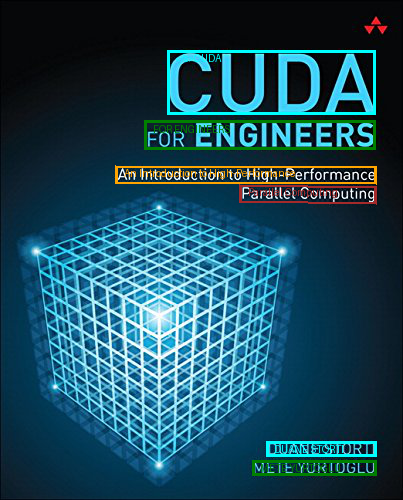

In [ ]:
output_image = copy.deepcopy(image)
draw_ocr_bboxes(output_image, results['<OCR_WITH_REGION>'])

## Cascaded tasks

### Caption + Phrase Grounding

results format:

{
 '\<CAPTION': pure_text,
{'\<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}
}

In [ ]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw)

In [ ]:
task_prompt = '<CAPTION>'
results = run_example(task_prompt)
text_input = results[task_prompt]
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input)
results['<CAPTION>'] = text_input

In [ ]:
results

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[34.23999786376953,
    159.1199951171875,
    582.0800170898438,
    374.6399841308594],
   [1.5999999046325684,
    4.079999923706055,
    639.0399780273438,
    305.03997802734375]],
  'labels': ['A green car', 'a yellow building']},
 '<CAPTION>': 'A green car parked in front of a yellow building.'}

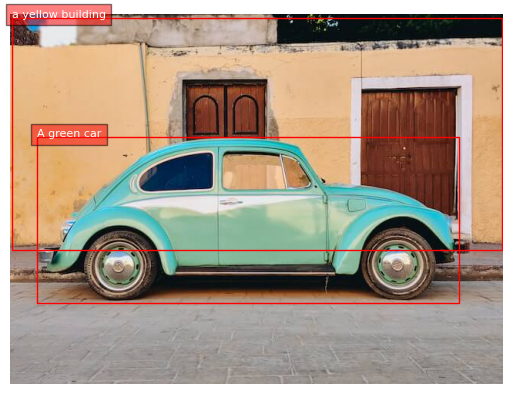

In [ ]:
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])

### Detailed Caption + Phrase Grounding

results format:

{
 '\<DETAILED_CAPTION': pure_text,
{'\<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}
}

In [ ]:
task_prompt = '<DETAILED_CAPTION>'
results = run_example(task_prompt)
text_input = results[task_prompt]
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input)
results['<DETAILED_CAPTION>'] = text_input

In [ ]:
results

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[33.599998474121094,
    158.63999938964844,
    582.719970703125,
    375.1199951171875],
   [1.5999999046325684, 5.039999961853027, 639.0399780273438, 306.0],
   [452.79998779296875,
    94.31999969482422,
    582.0800170898438,
    265.67999267578125],
   [222.39999389648438,
    84.23999786376953,
    335.03997802734375,
    167.27999877929688],
   [2.240000009536743,
    1.1999999284744263,
    639.0399780273438,
    43.91999816894531],
   [343.3599853515625,
    1.1999999284744263,
    639.0399780273438,
    40.55999755859375],
   [2.240000009536743,
    1.1999999284744263,
    638.3999633789062,
    43.91999816894531],
   [18.239999771118164,
    1.1999999284744263,
    104.63999938964844,
    45.36000061035156]],
  'labels': ['a blue Volkswagen Beetle',
   'a yellow building',
   'brown doors',
   'brown doors',
   'trees',
   'trees',
   'a clear blue sky',
   'a clear blue sky']},
 '<DETAILED_CAPTION>': 'The image shows a blue Vol

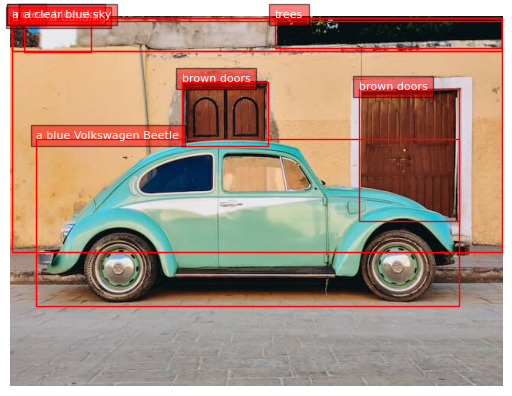

In [ ]:
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])

### More Detailed Caption + Phrase Grounding

results format:

{
 '\<MORE_DETAILED_CAPTION': pure_text,
{'\<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[x1, y1, x2, y2], ...], 'labels': ['', '', ...]}}
}

In [ ]:
task_prompt = '<MORE_DETAILED_CAPTION>'
results = run_example(task_prompt)
text_input = results[task_prompt]
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input)
results['<MORE_DETAILED_CAPTION>'] = text_input

In [ ]:
results

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[35.52000045776367,
    157.67999267578125,
    581.4400024414062,
    372.7200012207031],
   [1.5999999046325684,
    340.0799865722656,
    639.0399780273438,
    479.2799987792969],
   [454.0799865722656,
    93.83999633789062,
    580.7999877929688,
    263.2799987792969],
   [223.67999267578125,
    84.23999786376953,
    333.7599792480469,
    163.9199981689453],
   [36.79999923706055,
    157.67999267578125,
    580.1599731445312,
    372.239990234375],
   [454.0799865722656,
    93.83999633789062,
    581.4400024414062,
    263.2799987792969],
   [223.67999267578125,
    84.72000122070312,
    333.7599792480469,
    163.9199981689453],
   [164.16000366210938,
    177.36000061035156,
    265.2799987792969,
    232.0800018310547],
   [2.879999876022339,
    4.559999942779541,
    639.0399780273438,
    301.1999816894531],
   [19.520000457763672, 1.1999999284744263, 639.0399780273438, 42.0],
   [20.15999984741211,
    0.719999969005584

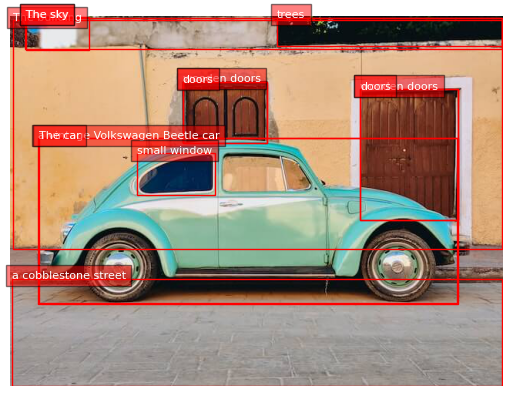

In [ ]:
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])